<a href="https://colab.research.google.com/github/the9kim/Machine-Deep-Learning-Practice/blob/main/K_NNRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor Regression Model
- The K-NN Regression model makes predictions by finding the k closest neighbors and averaging their target values.

### 1. Data Preparation and Preprocessing

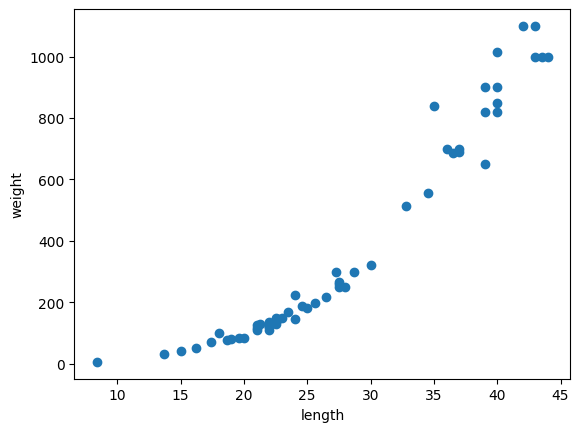

In [102]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [103]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# The training data needs to be reshaped because the training set should be a 2-Dimensional array
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)



## 2. Trainig K-NN Regression Model

### Coefficient of determination

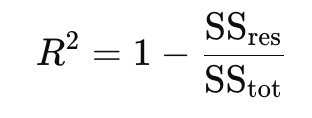


- SS
res
​
  (Residual Sum of Squares) is the sum of the squared differences between the observed values and the values predicted by the model.
- SS
tot
​
  (Total Sum of Squares) is the sum of the squared differences between the observed values and the mean of the observed values.

In [104]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [105]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

# The mean absolute error returns the average of the absolute differences between the observed values and the valuses predicted by the model
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [106]:
# The score of training dataset is lower than the score of test dataset, which mean the model is underfitted
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


## 3. Parameter Tuning to Solve Underfitting Issues

In [107]:
# To make the model complicated and solve the underfitting issue, reduce the number of nearest neighbors

knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609
